# Mobile Activity & Usage Prediction Dataset 

Topic:
Study and manipulation of data from different sources for class classification using 
artificial intelligence (AI) algorithms.

The data acquisition can be done using datasets available on the web or else acquired
through systems with sensors.

The dataset must have at least **5 features** (columns with different characteristics).

## Project Requirements 

<input type="checkbox"/> Analysis of Dataset Features.

<input type="checkbox"/> Preparation of the data to put into an AI model.

<input type="checkbox"/> Study of the most suitable Ai model for the chosen dataset.

<input type="checkbox"/> Application of the selected Ai model to the dataset with and without the application of PCA/LDA techniques.

<input type="checkbox"/> Analysis of the Ai model training (Confusion matrix, learning curves, etc...).

<input type="checkbox"/> Study of the most important features of the dataset (feature importance) to improve the accuracy of the Ai model.

<input type="checkbox"/> Feature Importance self Obtained.

## Valorization of the Process

<input type="checkbox"/>  Hardware for acquiring the dataset.

<input type="checkbox"/>  Application of data combination techniques (example: data alignment, 
downsampling/upsampling, etc...).

<input type="checkbox"/>  Application of data quality improvement techniques (example: filters).

<input type="checkbox"/>  Extraction of additional features from the initial data (example: FFT/MFCC from an audio window 
from an audio window, etc...).

<input type="checkbox"/>  Other approaches...

## Brief Description of the Work

The following code analyses two datasets collected from 6 different cell phones using the as a collection method Home Assistant resources to gather data from 51 different features with the objective of test and develop skills in the field of data fusion according with the project defined by the professor V. Oliveira (voliveira@ipca.pt)

The authors of the following project and respective data are: 

@fandrepm18
@JoaquinDillen
@nunof98




# Load Dataset

In [ ]:
import pandas as pd

filename = 'reclassifying_features/dataset_v1.csv'

# load dataset
df = pd.read_csv(f'datasets/{filename}')
df

In [3]:
# set timestamp column as index
df = df.set_index('time')
df

,app_memory,battery_power,last_update_trigger,light_sensor,active_notification_count,...,speakerphone,mobile_data,wifi_state,power_save,device_id
time,,,,,,,,,,,
2023-01-17 00:15:00,0.00000,0.000000,SensorWorker,0.000000,0.00,...,off,off,off,off,SMG960F
2023-01-17 00:30:00,0.00000,0.000000,SensorWorker,0.000000,0.00,...,off,off,off,off,SMG960F
2023-01-17 00:45:00,0.00000,0.000000,SensorWorker,0.000000,0.00,...,off,off,off,off,SMG960F
2023-01-17 01:00:00,0.00000,0.000000,SensorWorker,0.000000,0.00,...,off,off,off,off,SMG960F
2023-01-17 01:15:00,0.00000,0.000000,SensorWorker,0.000000,0.00,...,off,off,off,off,SMG960F
...,...,...,...,...,...,...,...,...,...,...,...
2023-01-26 19:00:00,0.01175,-0.002500,android.intent.action.SCREEN_ON,21.333333,9.00,...,on,off,off,off,SMA528B
2023-01-26 19:15:00,0.01450,0.000000,android.net.wifi.STATE_CHANGE,13.500000,10.00,...,on,off,off,off,SMA528B
2023-01-26 19:30:00,0.01200,-0.003333,android.intent.action.PHONE_STATE,0.666667,11.75,...,on,off,off,off,SMA528B


## Analysis of dataset features
Analyses the statistical information about each variable.

In [4]:
df.describe()

,app_memory,battery_power,light_sensor,active_notification_count,pressure_sensor,...,volume_level_accessibility,mobile_rx_gb,mobile_tx_gb,volume_level_system,bluetooth_connection
count,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,...,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000
mean,0.012281,-0.082329,65.701824,2.571404,212.029130,...,3.812421,0.671618,0.035222,0.962688,0.332182
std,0.012065,0.414615,429.619220,3.731159,412.718471,...,4.328333,1.292121,0.068907,2.355609,0.457608
min,0.000000,-3.010000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.012000,0.000000,0.000000,1.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000
75%,0.021000,0.000000,21.714286,3.800000,0.000000,...,7.333333,0.726000,0.039000,0.000000,0.500000
max,0.064000,5.480000,15635.727273,22.500000,1029.650000,...,15.000000,5.681000,0.340500,14.000000,2.000000


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5664 entries, 2023-01-17 00:15:00 to 2023-01-26 20:00:00
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   app_memory                  5664 non-null   float64
 1   battery_power               5664 non-null   float64
 2   last_update_trigger         5664 non-null   object 
 3   light_sensor                5664 non-null   float64
 4   active_notification_count   5664 non-null   float64
 5   pressure_sensor             5664 non-null   float64
 6   battery_temperature         5664 non-null   float64
 7   screen_brightness           5664 non-null   float64
 8   device_locked               5664 non-null   object 
 9   wifi_link_speed             5664 non-null   float64
 10  interactive                 5664 non-null   object 
 11  doze_mode                   5664 non-null   object 
 12  battery_level               5664 non-null   float64
 13  wifi_

app_memory                   0
battery_power                0
last_update_trigger          0
light_sensor                 0
active_notification_count    0
                            ..
speakerphone                 0
mobile_data                  0
wifi_state                   0
power_save                   0
device_id                    0
Length: 49, dtype: int64

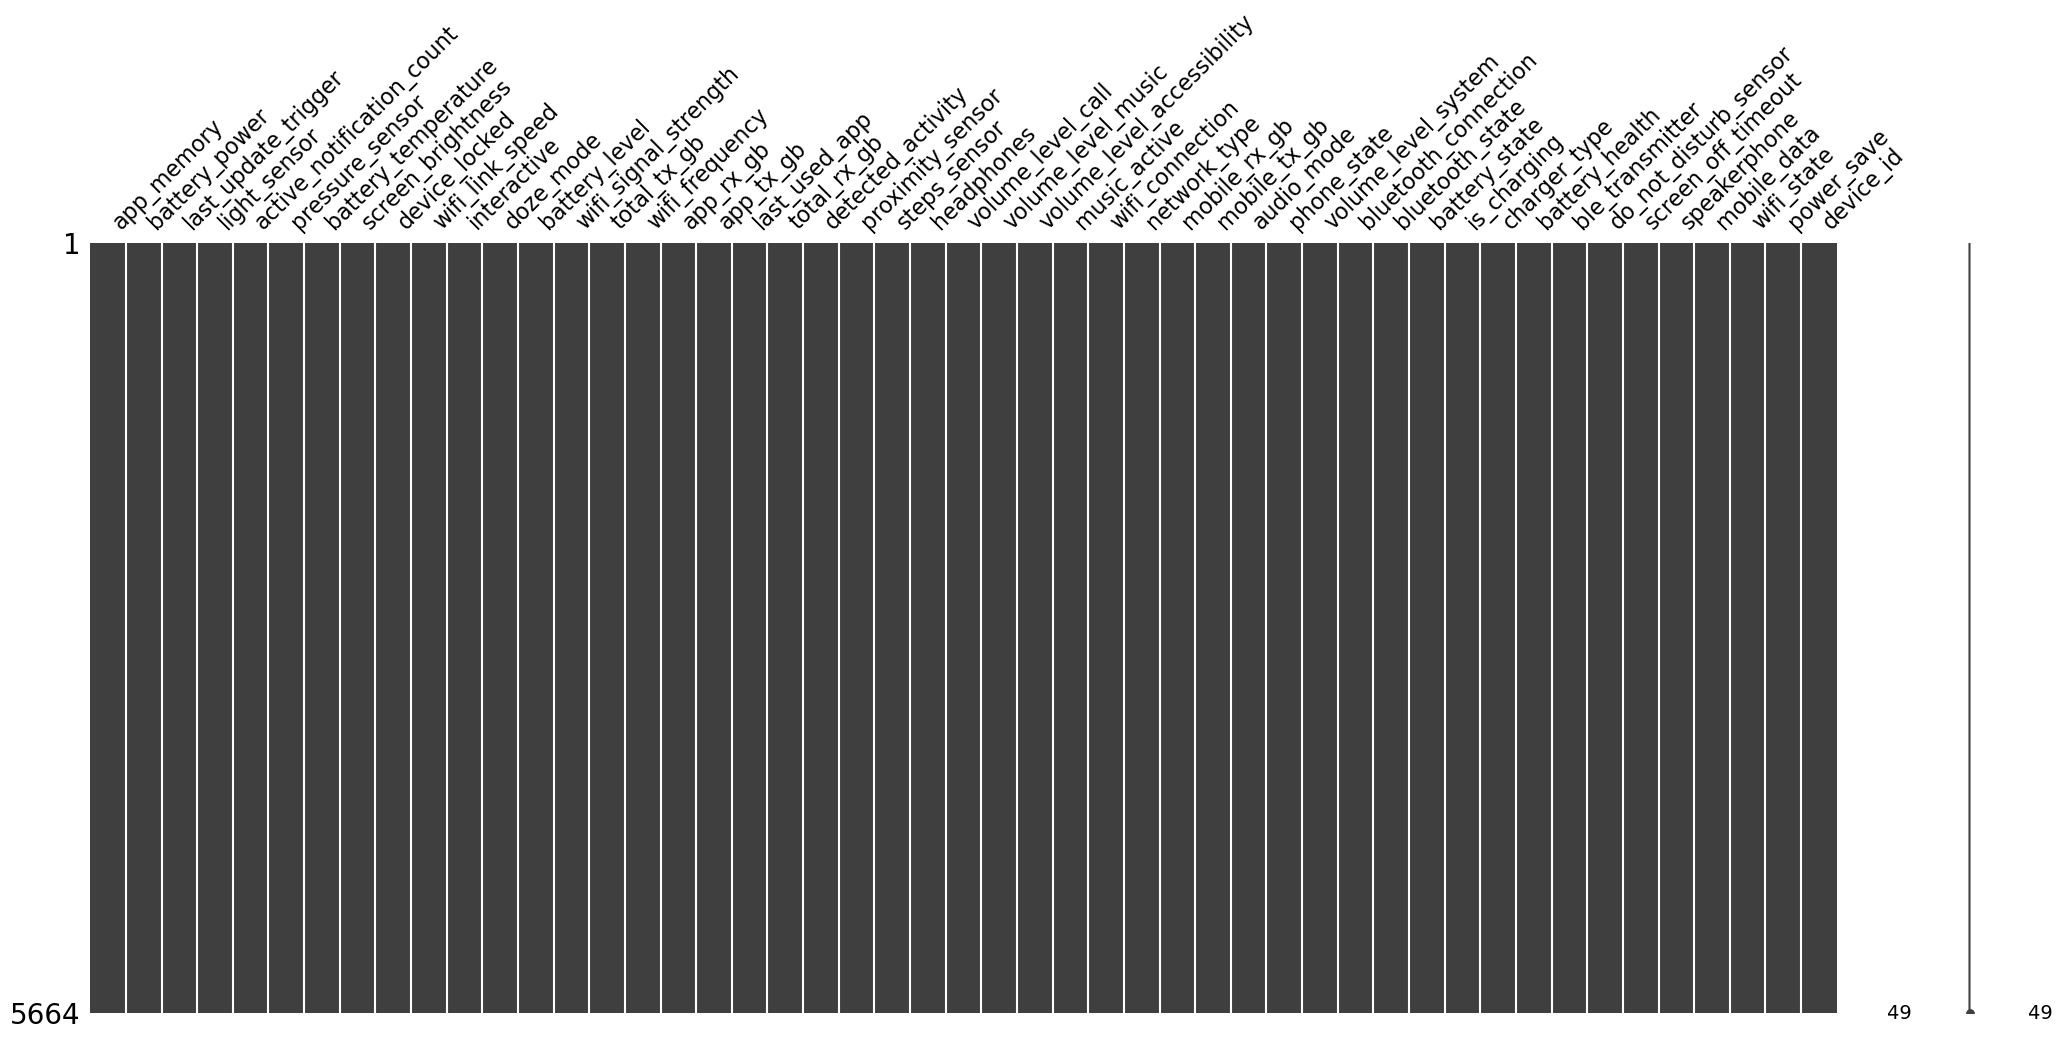

In [6]:
import missingno as msno

# check for missing values
msno.matrix(df)
df.isnull().sum()

In [7]:
df.dtypes

app_memory                   float64
battery_power                float64
last_update_trigger           object
light_sensor                 float64
active_notification_count    float64
                              ...   
speakerphone                  object
mobile_data                   object
wifi_state                    object
power_save                    object
device_id                     object
Length: 49, dtype: object

<AxesSubplot: >

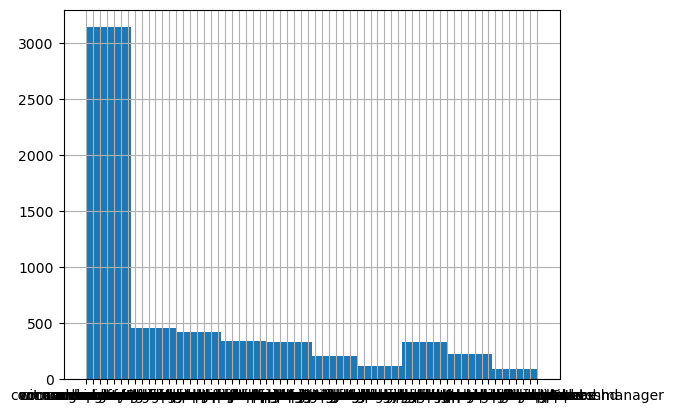

In [3]:
df['last_used_app'].hist()

## Encode categorical features

In [8]:
import category_encoders as ce

# select categorical columns
cat_cols = df.select_dtypes(include="object").columns.tolist()
cat_cols.remove('last_used_app')

encoder = ce.OrdinalEncoder(cols=cat_cols)
df = encoder.fit_transform(df)
df

,app_memory,battery_power,last_update_trigger,light_sensor,active_notification_count,...,speakerphone,mobile_data,wifi_state,power_save,device_id
time,,,,,,,,,,,
2023-01-17 00:15:00,0.00000,0.000000,1,0.000000,0.00,...,1,1,1,1,1
2023-01-17 00:30:00,0.00000,0.000000,1,0.000000,0.00,...,1,1,1,1,1
2023-01-17 00:45:00,0.00000,0.000000,1,0.000000,0.00,...,1,1,1,1,1
2023-01-17 01:00:00,0.00000,0.000000,1,0.000000,0.00,...,1,1,1,1,1
2023-01-17 01:15:00,0.00000,0.000000,1,0.000000,0.00,...,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2023-01-26 19:00:00,0.01175,-0.002500,3,21.333333,9.00,...,2,1,1,1,6
2023-01-26 19:15:00,0.01450,0.000000,10,13.500000,10.00,...,2,1,1,1,6
2023-01-26 19:30:00,0.01200,-0.003333,11,0.666667,11.75,...,2,1,1,1,6


In [9]:
df.describe()

,app_memory,battery_power,last_update_trigger,light_sensor,active_notification_count,...,speakerphone,mobile_data,wifi_state,power_save,device_id
count,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000,...,5664.000000,5664.000000,5664.000000,5664.000000,5664.000000
mean,0.012281,-0.082329,4.077860,65.701824,2.571404,...,1.686970,1.823976,1.871469,1.228814,3.500000
std,0.012065,0.414615,4.244402,429.619220,3.731159,...,0.981193,1.214247,1.205118,0.667007,1.707976
min,0.000000,-3.010000,1.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,2.000000
50%,0.012000,0.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,3.500000
75%,0.021000,0.000000,7.000000,21.714286,3.800000,...,2.000000,3.000000,3.000000,1.000000,5.000000
max,0.064000,5.480000,22.000000,15635.727273,22.500000,...,4.000000,4.000000,4.000000,4.000000,6.000000


## Get features and labels

In [10]:
# get features
X = df.drop(['last_used_app'], axis=1)
X

,app_memory,battery_power,last_update_trigger,light_sensor,active_notification_count,...,speakerphone,mobile_data,wifi_state,power_save,device_id
time,,,,,,,,,,,
2023-01-17 00:15:00,0.00000,0.000000,1,0.000000,0.00,...,1,1,1,1,1
2023-01-17 00:30:00,0.00000,0.000000,1,0.000000,0.00,...,1,1,1,1,1
2023-01-17 00:45:00,0.00000,0.000000,1,0.000000,0.00,...,1,1,1,1,1
2023-01-17 01:00:00,0.00000,0.000000,1,0.000000,0.00,...,1,1,1,1,1
2023-01-17 01:15:00,0.00000,0.000000,1,0.000000,0.00,...,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2023-01-26 19:00:00,0.01175,-0.002500,3,21.333333,9.00,...,2,1,1,1,6
2023-01-26 19:15:00,0.01450,0.000000,10,13.500000,10.00,...,2,1,1,1,6
2023-01-26 19:30:00,0.01200,-0.003333,11,0.666667,11.75,...,2,1,1,1,6


In [11]:
# get labels
y = df['last_used_app']
y

time
2023-01-17 00:15:00                         unknown
2023-01-17 00:30:00                         unknown
2023-01-17 00:45:00                         unknown
2023-01-17 01:00:00                         unknown
2023-01-17 01:15:00                         unknown
                                   ...             
2023-01-26 19:00:00    com.sec.android.app.launcher
2023-01-26 19:15:00    com.sec.android.app.launcher
2023-01-26 19:30:00    com.sec.android.app.launcher
2023-01-26 19:45:00    com.sec.android.app.launcher
2023-01-26 20:00:00    com.sec.android.app.launcher
Name: last_used_app, Length: 5664, dtype: object

## Split dataset into train and test sets

In [12]:
from sklearn.model_selection import train_test_split

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)



print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3964, 48) (1700, 48) (3964,) (1700,)


# AdaBoost Classifier

In [19]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(X_train, y_train)

y_pred_abc = abc.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_abc)
print (cm)
acc_abc = accuracy_score(y_test, y_pred_abc)
print (acc_abc)

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0 663   0]
 [  0   0   0 ...   0   0   0]]
0.4435294117647059


# Naïve Bayes

In [24]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [25]:
y_pred = nb.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc_nb = accuracy_score(y_test, y_pred)
print(acc_nb)

[[  0   0   0 ...   0   0   0]
 [  0   6   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   1   0   0]
 [  0   0   0 ...   1 665   0]
 [  0   0   0 ...   0   0   1]]
0.6394117647058823


# Kernel SVM (Support Vector Machine)

In [27]:
from sklearn.svm import SVC
svc_rbf = SVC(kernel = 'rbf', random_state = 0)
svc_rbf.fit(X_train, y_train)

SVC(random_state=0)

In [28]:
y_pred_svc_rbf = svc_rbf.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_svc_rbf)
print (cm)
acc_svc_rbf = accuracy_score(y_test, y_pred_svc_rbf)
print (acc_svc_rbf)

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0 666   0]
 [  0   0   0 ...   0   0   0]]
0.5264705882352941


# Classification models

In [31]:
scores = {}

## Decision tree Classifier

In [32]:
from sklearn.tree import DecisionTreeClassifier

# build decision tree classifier
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
# train decision tree
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# make prediction
y_pred_clf_gini = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred_clf_gini))
print(f'Train accuracy:\t {clf_gini.score(X_train, y_train)}')
print(f'Test accuracy:\t {clf_gini.score(X_test, y_test)}')
scores['Decision Tree'] =  clf_gini.score(X_test, y_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_clf_gini)

## Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

# build random forest classifier
rfc = RandomForestClassifier()
# train random forest
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# make prediction
y_pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, y_pred_rfc))
print(f'Train accuracy:\t {rfc.score(X_train, y_train)}')
print(f'Test accuracy:\t {rfc.score(X_test, y_test)}')
scores['Random Forest'] = rfc.score(X_test, y_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rfc)

## KNeighbors Classifier

In [38]:
from sklearn.neighbors import KNeighborsClassifier

# build KNeighbors classifier
neigh = KNeighborsClassifier(n_neighbors=2)
# train KNeighbors
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
# make prediction
y_pred_neigh = neigh.predict(X_test)
print(classification_report(y_test, y_pred_neigh))
print(f'Train accuracy:\t {neigh.score(X_train, y_train)}')
print(f'Test accuracy:\t {neigh.score(X_test, y_test)}')
scores['KNN'] =  neigh.score(X_test, y_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_neigh)

## MLP

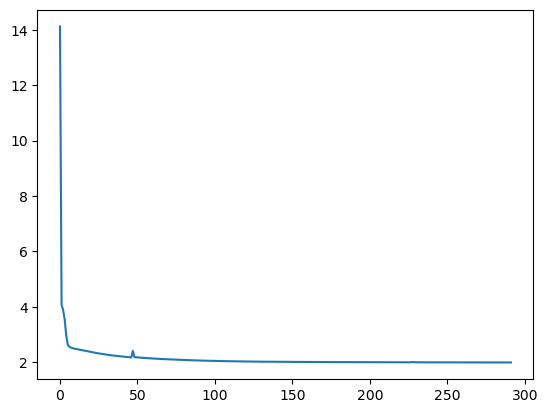

In [41]:
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot as plt

# build MLP classifier
model = MLPClassifier(hidden_layer_sizes=(200, 40, 10), activation='relu', solver='adam', max_iter=1000)
# train model
model.fit(X_train, y_train)
plt.plot(model.loss_curve_)

In [ ]:
# make prediction
y_pred_mlp = model.predict(X_test)
print(classification_report(y_test, y_pred_mlp))
print(f'Train accuracy:\t {model.score(X_train, y_train)}')
print(f'Test accuracy:\t {model.score(X_test, y_test)}')
scores['MLP'] =  model.score(X_test, y_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_mlp)

# PCA or LDA Usage

Our Dataset is presented with several datapoints so we can consider the fact that our dataset is a multi-sensor data fusion application, the need to keep the computational load low is very important, a low-dimensional common representational format may be the answer, to apply a dimension-reducing, or subspace technique to the raw input data. 

## PCA Classifier

In [43]:
scores_pca = {}

In [44]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

X_pca.shape, y.shape

((5664, 3), (5664,))

PCA variance_ratio
The percentage of the explained variance is: explained_variance_ratio_

The variance i.e. the eigenvalues of the covariance matrix is: explained_variance_

Formula: explained_variance_ratio_ = explained_variance_ / np.sum(explained_variance_)

In [45]:
pca.explained_variance_ratio_

array([9.94993809e-01, 4.73875485e-03, 1.93734560e-04])

In [46]:
pca.explained_variance_ratio_.sum()

0.999926298857356

In [47]:
# split X and y into training and testing sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.30, random_state=42, stratify=y)

print(X_train_pca.shape, X_test_pca.shape, y_train_pca.shape, y_test_pca.shape)

(3964, 3) (1700, 3) (3964,) (1700,)


# AdaBoost Classifier with PCA

In [48]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(X_train_pca, y_train_pca)

y_pred_abc = abc.predict(X_test_pca)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test_pca, y_pred_abc)
print (cm)
acc_abc = accuracy_score(y_test_pca, y_pred_abc)
print (acc_abc)

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0 663   0]
 [  0   0   0 ...   0   0   0]]
0.5135294117647059


# Naïve Bayes with pca

In [49]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_pca, y_train_pca)

GaussianNB()

In [50]:
y_pred_pca = nb.predict(X_test_pca)

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_pca = confusion_matrix(y_test_pca, y_pred_pca)
print(cm_pca)
acc_nb_pca = accuracy_score(y_test, y_pred_pca)
print(acc_nb_pca)

[[  0   0   0 ...   0   0   0]
 [  0   6   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0 665   0]
 [  0   0   0 ...   0   0   0]]
0.5264705882352941


# Kernel SVM (Support Vector Machine) with pca

In [52]:
from sklearn.svm import SVC
svc_rbf = SVC(kernel = 'rbf', random_state = 0)
svc_rbf.fit(X_train_pca, y_train_pca)

SVC(random_state=0)

In [53]:
y_pred_svc_rbf_pca = svc_rbf.predict(X_test_pca)

In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_pca = confusion_matrix(y_test_pca, y_pred_svc_rbf_pca)
print (cm_pca)
acc_svc_rbf_pca = accuracy_score(y_test_pca, y_pred_svc_rbf_pca)
print (acc_svc_rbf_pca)

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0 666   0]
 [  0   0   0 ...   0   0   0]]
0.5229411764705882


### Decision tree

In [27]:
# build decision tree classifier
clf_gini_pca = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
# train decision tree
clf_gini_pca.fit(X_train_pca, y_train_pca)

DecisionTreeClassifier(max_depth=5, random_state=0)

               precision    recall  f1-score   support

Entertainment       0.58      0.34      0.43       222
   Navigating       0.71      0.41      0.52       271
         Work       0.64      0.87      0.74       537
  unavaliable       0.97      0.99      0.98       670

     accuracy                           0.77      1700
    macro avg       0.72      0.65      0.67      1700
 weighted avg       0.77      0.77      0.76      1700

Train accuracy:	 0.777497477295661
Test accuracy:	 0.7747058823529411


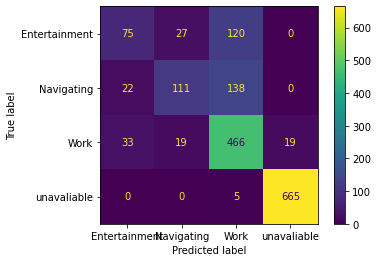

In [28]:
# make prediction
y_pred_clf_gini_pca = clf_gini_pca.predict(X_test_pca)
print(classification_report(y_test_pca, y_pred_clf_gini_pca))
print(f'Train accuracy:\t {clf_gini_pca.score(X_train_pca, y_train_pca)}')
print(f'Test accuracy:\t {clf_gini_pca.score(X_test_pca, y_test_pca)}')
scores_pca['Decision Tree PCA'] =  clf_gini_pca.score(X_test_pca, y_test_pca)

ConfusionMatrixDisplay.from_predictions(y_test_pca, y_pred_clf_gini_pca)

### Random Forest

In [29]:
# build random forest classifier
rfc_pca = RandomForestClassifier(criterion='gini', n_estimators=5, random_state=1, n_jobs=2)
# train random forest
rfc_pca.fit(X_train_pca, y_train_pca)

RandomForestClassifier(n_estimators=5, n_jobs=2, random_state=1)

               precision    recall  f1-score   support

Entertainment       0.77      0.80      0.78       222
   Navigating       0.84      0.84      0.84       271
         Work       0.86      0.85      0.86       537
  unavaliable       0.99      0.98      0.98       670

     accuracy                           0.89      1700
    macro avg       0.86      0.87      0.87      1700
 weighted avg       0.90      0.89      0.89      1700

Train accuracy:	 0.9846115035317861
Test accuracy:	 0.8941176470588236


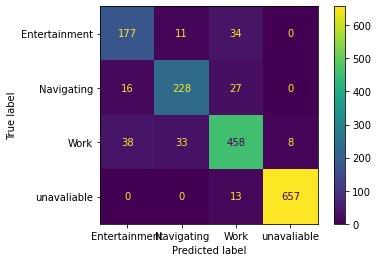

In [30]:
# make prediction
y_pred_rfc_pca = rfc_pca.predict(X_test_pca)
print(classification_report(y_test_pca, y_pred_rfc_pca))
print(f'Train accuracy:\t {rfc_pca.score(X_train_pca, y_train_pca)}')
print(f'Test accuracy:\t {rfc_pca.score(X_test_pca, y_test_pca)}')
scores_pca['Random Forest PCA'] = rfc_pca.score(X_test_pca, y_test_pca)

ConfusionMatrixDisplay.from_predictions(y_test_pca, y_pred_rfc_pca)

### KNeighbors Classifier

In [31]:
# build KNeighbors classifier
neigh_pca = KNeighborsClassifier(n_neighbors=2)
# train KNeighbors
neigh_pca.fit(X_train_pca, y_train_pca)

KNeighborsClassifier(n_neighbors=2)

               precision    recall  f1-score   support

Entertainment       0.77      0.89      0.83       222
   Navigating       0.82      0.87      0.85       271
         Work       0.88      0.84      0.86       537
  unavaliable       0.99      0.95      0.97       670

     accuracy                           0.90      1700
    macro avg       0.87      0.89      0.88      1700
 weighted avg       0.90      0.90      0.90      1700

Train accuracy:	 0.9513118062563067
Test accuracy:	 0.8952941176470588


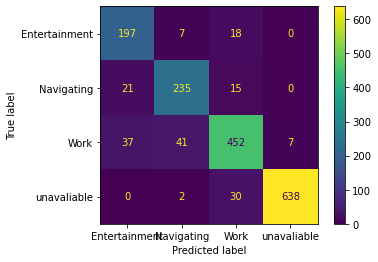

In [32]:
# make prediction
y_pred_neigh_pca = neigh_pca.predict(X_test_pca)
print(classification_report(y_test_pca, y_pred_neigh_pca))
print(f'Train accuracy:\t {neigh_pca.score(X_train_pca, y_train_pca)}')
print(f'Test accuracy:\t {neigh_pca.score(X_test_pca, y_test_pca)}')
scores_pca['KNN PCA'] =  neigh_pca.score(X_test_pca, y_test_pca)

ConfusionMatrixDisplay.from_predictions(y_test_pca, y_pred_neigh_pca)

### MLP

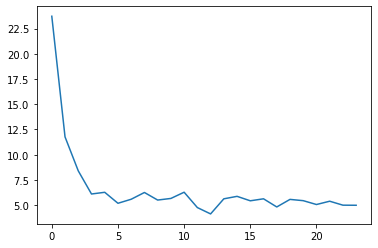

In [33]:
# build MLP classifier
model_pca = MLPClassifier(hidden_layer_sizes=(200, 40, 10), activation='relu', solver='adam', max_iter=1000)
# train model
model_pca.fit(X_train_pca, y_train_pca)
plt.plot(model_pca.loss_curve_)

               precision    recall  f1-score   support

Entertainment       0.00      0.00      0.00       222
   Navigating       0.36      0.48      0.41       271
         Work       0.76      0.18      0.29       537
  unavaliable       0.55      1.00      0.71       670

     accuracy                           0.53      1700
    macro avg       0.42      0.41      0.35      1700
 weighted avg       0.51      0.53      0.44      1700

Train accuracy:	 0.5211907164480323
Test accuracy:	 0.5258823529411765


C:\Users\lemos\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lemos\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lemos\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


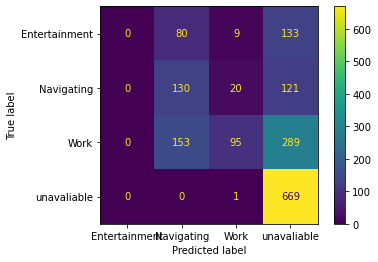

In [34]:
# make prediction
y_pred_mlp_pca = model_pca.predict(X_test_pca)
print(classification_report(y_test_pca, y_pred_mlp_pca))
print(f'Train accuracy:\t {model_pca.score(X_train_pca, y_train_pca)}')
print(f'Test accuracy:\t {model_pca.score(X_test_pca, y_test_pca)}')
scores_pca['MLP_PCA'] =  model_pca.score(X_test_pca, y_test_pca)

ConfusionMatrixDisplay.from_predictions(y_test_pca, y_pred_mlp_pca)

## LDA Classifier

In [27]:
scores_lda = {}

In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=3)
X_lda = lda.fit(X, y).transform(X)
X_lda.shape

(5664, 3)

In [29]:
# split X and y into training and testing sets
X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split(X_lda, y, test_size=0.30, random_state=42, stratify=y)

print(X_train_lda.shape, X_test_lda.shape, y_train_lda.shape, y_test_lda.shape)

(3964, 3) (1700, 3) (3964,) (1700,)


# AdaBoost Classifier with LDA

In [30]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(X_train_lda, y_train_lda)

y_pred_abc_lda = abc.predict(X_test_lda)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test_lda, y_pred_abc_lda)
print (cm)
acc_abc_lda = accuracy_score(y_test_lda, y_pred_abc_lda)
print (acc_abc_lda)

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0 665   0]
 [  0   0   0 ...   0   0   0]]
0.4535294117647059


# Naïve Bayes with LDA

In [32]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_lda, y_train_lda)

GaussianNB()

In [33]:
y_pred_lda = nb.predict(X_test_lda)

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_lda = confusion_matrix(y_test_lda, y_pred_lda)
print(cm_lda)
acc_nb_lda = accuracy_score(y_test_lda, y_pred_lda)
print(acc_nb_lda)

[[  0   0   0 ...   0   0   0]
 [  0   5   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   3 661   0]
 [  0   0   0 ...   0   0   0]]
0.6188235294117647


# Kernel SVM (Support Vector Machine) with LDA

In [24]:
from sklearn.svm import SVC
svc_rbf = SVC(kernel = 'rbf', random_state = 0)
svc_rbf.fit(X_train_pca, y_train_pca)

SVC(random_state=0)

In [25]:
y_pred_svc_rbf_pca = svc_rbf.predict(X_test_pca)

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_pca = confusion_matrix(y_test_pca, y_pred_svc_rbf_pca)
print (cm_pca)
acc_svc_rbf_pca = accuracy_score(y_test_pca, y_pred_svc_rbf_pca)
print (acc_svc_rbf_pca)

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0 666   0]
 [  0   0   0 ...   0   0   0]]
0.5229411764705882


### Decision tree

In [38]:
# build decision tree classifier
clf_gini_lda = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
# train decision tree
clf_gini_lda.fit(X_train_lda, y_train_lda)

DecisionTreeClassifier(max_depth=5, random_state=0)

               precision    recall  f1-score   support

Entertainment       0.66      0.59      0.62       222
   Navigating       0.78      0.49      0.60       271
         Work       0.70      0.87      0.78       537
  unavaliable       1.00      0.99      1.00       670

     accuracy                           0.82      1700
    macro avg       0.78      0.74      0.75      1700
 weighted avg       0.83      0.82      0.81      1700

Train accuracy:	 0.8375378405650857
Test accuracy:	 0.8205882352941176


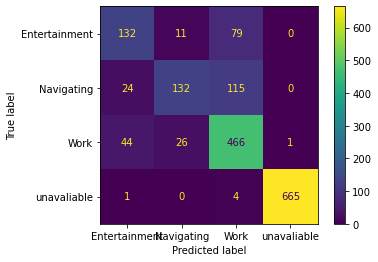

In [39]:
# make prediction
y_pred_clf_gini_lda = clf_gini_lda.predict(X_test_lda)
print(classification_report(y_test_lda, y_pred_clf_gini_lda))
print(f'Train accuracy:\t {clf_gini_lda.score(X_train_lda, y_train_lda)}')
print(f'Test accuracy:\t {clf_gini_lda.score(X_test_lda, y_test_lda)}')
scores_lda['Decision Tree LDA'] =  clf_gini_lda.score(X_test_lda, y_test_lda)

ConfusionMatrixDisplay.from_predictions(y_test_lda, y_pred_clf_gini_lda)

### Random Forest

In [40]:
# build random forest classifier
rfc_lda = RandomForestClassifier(criterion='gini', n_estimators=5, random_state=1, n_jobs=2)
# train random forest
rfc_lda.fit(X_train_lda, y_train_lda)

RandomForestClassifier(n_estimators=5, n_jobs=2, random_state=1)

               precision    recall  f1-score   support

Entertainment       0.67      0.77      0.72       222
   Navigating       0.78      0.72      0.75       271
         Work       0.84      0.82      0.83       537
  unavaliable       1.00      1.00      1.00       670

     accuracy                           0.87      1700
    macro avg       0.82      0.83      0.82      1700
 weighted avg       0.87      0.87      0.87      1700

Train accuracy:	 0.9808274470232089
Test accuracy:	 0.8688235294117647


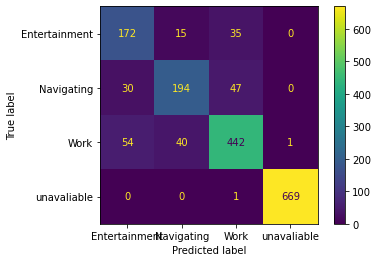

In [41]:
# make prediction
y_pred_rfc_lda = rfc_lda.predict(X_test_lda)
print(classification_report(y_test_lda, y_pred_rfc_lda))
print(f'Train accuracy:\t {rfc_lda.score(X_train_lda, y_train_lda)}')
print(f'Test accuracy:\t {rfc_lda.score(X_test_lda, y_test_lda)}')
scores_lda['Random Forest LDA'] = rfc_lda.score(X_test_lda, y_test_lda)

ConfusionMatrixDisplay.from_predictions(y_test_lda, y_pred_rfc_lda)

### KNeighbors Classifier

In [42]:
from sklearn.neighbors import KNeighborsClassifier

# build KNeighbors classifier
neigh_lda = KNeighborsClassifier(n_neighbors=5)
# train KNeighbors
neigh_lda.fit(X_train_lda, y_train_lda)

KNeighborsClassifier()

               precision    recall  f1-score   support

Entertainment       0.70      0.78      0.74       222
   Navigating       0.82      0.69      0.75       271
         Work       0.84      0.86      0.85       537
  unavaliable       1.00      1.00      1.00       670

     accuracy                           0.88      1700
    macro avg       0.84      0.83      0.83      1700
 weighted avg       0.88      0.88      0.88      1700

Train accuracy:	 0.9018668012108981
Test accuracy:	 0.8776470588235294


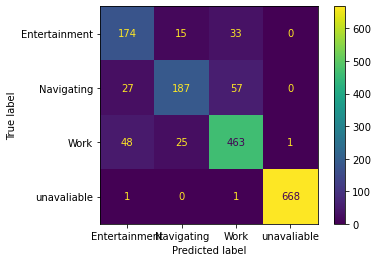

In [43]:
# make prediction
y_pred_neigh_lda = neigh_lda.predict(X_test_lda)
print(classification_report(y_test_lda, y_pred_neigh_lda))
print(f'Train accuracy:\t {neigh_lda.score(X_train_lda, y_train_lda)}')
print(f'Test accuracy:\t {neigh_lda.score(X_test_lda, y_test_lda)}')
scores_lda['KNN LDA'] =  neigh_lda.score(X_test_lda, y_test_lda)

ConfusionMatrixDisplay.from_predictions(y_test_lda, y_pred_neigh_lda)

### MLP

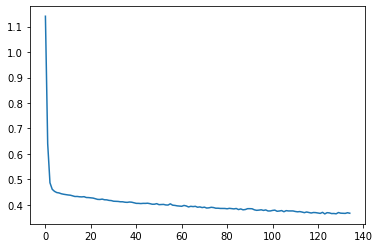

In [44]:
# build MLP classifier
model_lda = MLPClassifier(hidden_layer_sizes=(200, 40, 10), activation='relu', solver='adam', max_iter=1000)
# train model
model_lda.fit(X_train_lda, y_train_lda)
plt.plot(model_lda.loss_curve_)

               precision    recall  f1-score   support

Entertainment       0.69      0.69      0.69       222
   Navigating       0.71      0.69      0.70       271
         Work       0.79      0.80      0.80       537
  unavaliable       1.00      1.00      1.00       670

     accuracy                           0.85      1700
    macro avg       0.80      0.79      0.79      1700
 weighted avg       0.84      0.85      0.85      1700

Train accuracy:	 0.8564581231079718
Test accuracy:	 0.8452941176470589


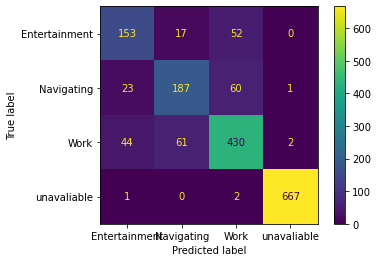

In [45]:
# make prediction
y_pred_mlp_lda = model_lda.predict(X_test_lda)
print(classification_report(y_test_lda, y_pred_mlp_lda))
print(f'Train accuracy:\t {model_lda.score(X_train_lda, y_train_lda)}')
print(f'Test accuracy:\t {model_lda.score(X_test_lda, y_test_lda)}')
scores_lda['MLP_LDA'] =  model_lda.score(X_test_lda, y_test_lda)

ConfusionMatrixDisplay.from_predictions(y_test_lda,y_pred_mlp_lda)

# Final scores

<BarContainer object of 4 artists>

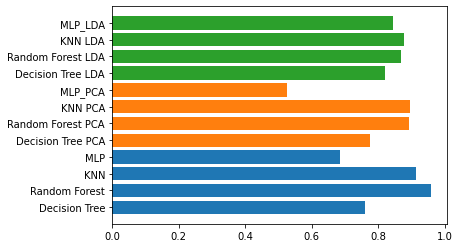

In [46]:
plt.barh(list(scores.keys()), scores.values())
plt.barh(list(scores_pca.keys()), scores_pca.values())
plt.barh(list(scores_lda.keys()), scores_lda.values())

In [47]:
scores

{'Decision Tree': 0.7611764705882353,
 'Random Forest': 0.9588235294117647,
 'KNN': 0.9147058823529411,
 'MLP': 0.6841176470588235}

In [48]:
scores_pca

{'Decision Tree PCA': 0.7747058823529411,
 'Random Forest PCA': 0.8941176470588236,
 'KNN PCA': 0.8952941176470588,
 'MLP_PCA': 0.5258823529411765}

In [49]:
scores_lda

{'Decision Tree LDA': 0.8205882352941176,
 'Random Forest LDA': 0.8688235294117647,
 'KNN LDA': 0.8776470588235294,
 'MLP_LDA': 0.8452941176470589}

In [96]:
# get the highest accuracy
max(max(scores.values()), max(scores_pca.values()), max(scores_lda.values()))

0.9588235294117647

# Normalized values

In [57]:
from sklearn.preprocessing import MinMaxScaler

# normalize values
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.        , 0.35453475, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.35453475, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.35453475, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.1875    , 0.35414213, 0.47619048, ..., 0.        , 0.        ,
        1.        ],
       [0.1796875 , 0.35453475, 0.42857143, ..., 0.        , 0.        ,
        1.        ],
       [0.1796875 , 0.35453475, 0.42857143, ..., 0.        , 0.        ,
        1.        ]])

In [58]:
# split X and y into training and testing sets
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.30, random_state=42, stratify=y)

print(X_train_scaled.shape, X_test_scaled.shape, y_train_scaled.shape, y_test_scaled.shape)

(3964, 48) (1700, 48) (3964,) (1700,)


# Classification models

In [59]:
scores_scaled = {}

# AdaBoost Classifier with Normalized values

In [60]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(X_train_scaled, y_train_scaled)

y_pred_abc_scaled = abc.predict(X_test_scaled)

from sklearn.metrics import confusion_matrix, accuracy_score
cm_scaled = confusion_matrix(y_test_scaled, y_pred_abc_scaled)
print (cm_scaled)
acc_abc_scaled = accuracy_score(y_test_scaled, y_pred_abc_scaled)
print (acc_abc_scaled)

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0 665   0]
 [  0   0   0 ...   0   0   0]]
0.44529411764705884


# Naïve Bayes with Normalized values

In [61]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_scaled, y_train_scaled)

GaussianNB()

In [62]:
y_pred_scaled = nb.predict(X_test_scaled)

In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_scaled = confusion_matrix(y_test_scaled, y_pred_scaled)
print(cm_scaled)
acc_nb_scaled = accuracy_score(y_test_scaled, y_pred_scaled)
print(acc_nb_scaled)

[[  0   0   0 ...   0   0   0]
 [  0   6   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   1   0   0]
 [  0   0   0 ...   0 660   0]
 [  0   0   0 ...   0   0   1]]
0.5958823529411764


# Kernel SVM (Support Vector Machine)

In [64]:
from sklearn.svm import SVC
svc_rbf = SVC(kernel = 'rbf', random_state = 0)
svc_rbf.fit(X_train_scaled, y_train_scaled)

SVC(random_state=0)

In [65]:
y_pred_svc_rbf_scaled = svc_rbf.predict(X_test_scaled)

In [66]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_scaled = confusion_matrix(y_test_scaled, y_pred_svc_rbf_scaled)
print (cm_scaled)
acc_svc_rbf_scaled = accuracy_score(y_test_scaled, y_pred_svc_rbf_scaled)
print (acc_svc_rbf_scaled)

[[  0   0   0 ...   0   0   0]
 [  0   5   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0 664   0]
 [  0   0   0 ...   0   0   0]]
0.8070588235294117


## Decision tree Classifier

In [53]:
# build decision tree classifier
clf_gini_scaled = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
# train decision tree
clf_gini_scaled.fit(X_train_scaled, y_train_scaled)

DecisionTreeClassifier(max_depth=5, random_state=0)

               precision    recall  f1-score   support

Entertainment       0.60      0.25      0.35       222
   Navigating       0.92      0.25      0.39       271
         Work       0.58      0.94      0.72       537
  unavaliable       1.00      0.99      1.00       670

     accuracy                           0.76      1700
    macro avg       0.77      0.61      0.61      1700
 weighted avg       0.80      0.76      0.73      1700

Train accuracy:	 0.777497477295661
Test accuracy:	 0.7611764705882353


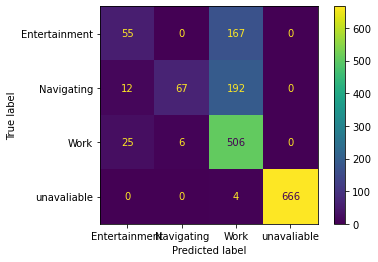

In [54]:
# make prediction
y_pred_clf_gini_scaled = clf_gini_scaled.predict(X_test_scaled)
print(classification_report(y_test_scaled, y_pred_clf_gini_scaled))
print(f'Train accuracy:\t {clf_gini_scaled.score(X_train_scaled, y_train_scaled)}')
print(f'Test accuracy:\t {clf_gini_scaled.score(X_test_scaled, y_test_scaled)}')
scores_scaled['Decision Tree (scaled)'] =  clf_gini_scaled.score(X_test_scaled, y_test_scaled)

ConfusionMatrixDisplay.from_predictions(y_test_scaled, y_pred_clf_gini_scaled)

## Random Forest

In [55]:
# build random forest classifier
rfc_scaled = RandomForestClassifier()
# train random forest
rfc_scaled.fit(X_train_scaled, y_train_scaled)

RandomForestClassifier()

               precision    recall  f1-score   support

Entertainment       0.91      0.91      0.91       222
   Navigating       0.94      0.89      0.91       271
         Work       0.93      0.96      0.94       537
  unavaliable       1.00      1.00      1.00       670

     accuracy                           0.96      1700
    macro avg       0.95      0.94      0.94      1700
 weighted avg       0.96      0.96      0.96      1700

Train accuracy:	 1.0
Test accuracy:	 0.9564705882352941


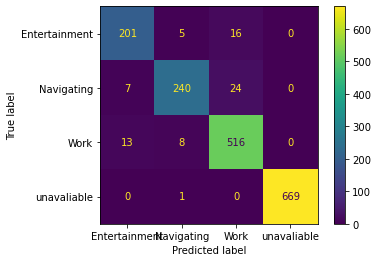

In [56]:
# make prediction
y_pred_rfc_scaled = rfc_scaled.predict(X_test_scaled)
print(classification_report(y_test_scaled, y_pred_rfc_scaled))
print(f'Train accuracy:\t {rfc_scaled.score(X_train_scaled, y_train_scaled)}')
print(f'Test accuracy:\t {rfc_scaled.score(X_test_scaled, y_test_scaled)}')
scores_scaled['Random Forest (scaled)'] = rfc_scaled.score(X_test_scaled, y_test_scaled)

ConfusionMatrixDisplay.from_predictions(y_test_scaled, y_pred_rfc_scaled)

## KNeighbors Classifier

In [57]:
# build KNeighbors classifier
neigh_scaled = KNeighborsClassifier(n_neighbors=2)
# train KNeighbors
neigh_scaled.fit(X_train_scaled, y_train_scaled)

KNeighborsClassifier(n_neighbors=2)

               precision    recall  f1-score   support

Entertainment       0.79      0.94      0.86       222
   Navigating       0.85      0.86      0.85       271
         Work       0.95      0.87      0.90       537
  unavaliable       1.00      1.00      1.00       670

     accuracy                           0.93      1700
    macro avg       0.89      0.92      0.90      1700
 weighted avg       0.93      0.93      0.93      1700

Train accuracy:	 0.9697275479313825
Test accuracy:	 0.9258823529411765


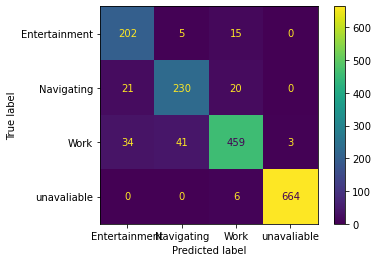

In [58]:
# make prediction
y_pred_neigh_scaled = neigh_scaled.predict(X_test_scaled)
print(classification_report(y_test_scaled, y_pred_neigh_scaled))
print(f'Train accuracy:\t {neigh_scaled.score(X_train_scaled, y_train_scaled)}')
print(f'Test accuracy:\t {neigh_scaled.score(X_test_scaled, y_test_scaled)}')
scores_scaled['KNN (scaled)'] =  neigh_scaled.score(X_test_scaled, y_test_scaled)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_neigh)

## MLP

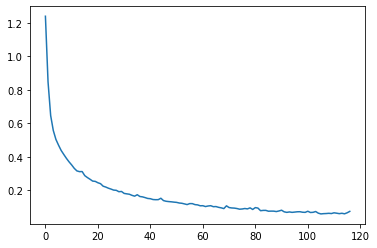

In [59]:
# build MLP classifier
model_scaled = MLPClassifier(hidden_layer_sizes=(200, 40, 10), activation='relu', solver='adam', max_iter=1000)
# train model
model_scaled.fit(X_train_scaled, y_train_scaled)
plt.plot(model_scaled.loss_curve_)

               precision    recall  f1-score   support

Entertainment       0.84      0.90      0.87       222
   Navigating       0.94      0.77      0.85       271
         Work       0.88      0.95      0.91       537
  unavaliable       1.00      0.99      1.00       670

     accuracy                           0.93      1700
    macro avg       0.92      0.90      0.91      1700
 weighted avg       0.93      0.93      0.93      1700

Train accuracy:	 0.9735116044399597
Test accuracy:	 0.93


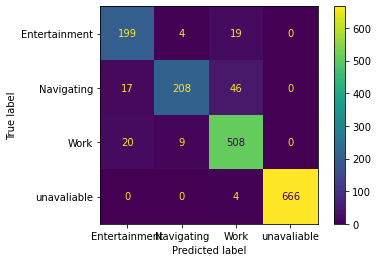

In [60]:
# make prediction
y_pred_mlp_scaled = model_scaled.predict(X_test_scaled)
print(classification_report(y_test_scaled, y_pred_mlp_scaled))
print(f'Train accuracy:\t {model_scaled.score(X_train_scaled, y_train_scaled)}')
print(f'Test accuracy:\t {model_scaled.score(X_test_scaled, y_test_scaled)}')
scores_scaled['MLP (scaled)'] =  model_scaled.score(X_test_scaled, y_test_scaled)

ConfusionMatrixDisplay.from_predictions(y_test_scaled, y_pred_mlp_scaled)

## PCA Classifier

In [67]:
scores_pca_scaled = {}

In [68]:
pca_scaled = PCA(n_components=25)
X_pca_scaled = pca_scaled.fit_transform(X_scaled)

X_pca_scaled.shape, y.shape

((5664, 25), (5664,))

In [69]:
pca_scaled.explained_variance_ratio_

array([0.40857972, 0.1217377 , 0.08202367, 0.06038291, 0.04074516,
       0.03285519, 0.0290708 , 0.02313988, 0.02202101, 0.01877711,
       0.01740641, 0.0157627 , 0.01284406, 0.01122862, 0.00976839,
       0.0091974 , 0.00783483, 0.00707137, 0.00677723, 0.00622328,
       0.00611171, 0.005754  , 0.00492885, 0.00474314, 0.0043351 ])

In [70]:
pca_scaled.explained_variance_ratio_.sum()

0.969320261336712

In [71]:
# split X and y into training and testing sets
X_train_pca_scaled, X_test_pca_scaled, y_train_pca_scaled, y_test_pca_scaled = train_test_split(X_pca_scaled, y, test_size=0.30, random_state=42, stratify=y)

print(X_train_pca_scaled.shape, X_test_pca_scaled.shape, y_train_pca_scaled.shape, y_test_pca_scaled.shape)

(3964, 25) (1700, 25) (3964,) (1700,)


# AdaBoost Classifier with Normalized data and PCA

In [72]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(X_train_pca_scaled, y_train_pca_scaled)

y_pred_abc_pca_scaled = abc.predict(X_test_pca_scaled)

from sklearn.metrics import confusion_matrix, accuracy_score
cm_pca_scaled = confusion_matrix(y_test_pca_scaled, y_pred_abc_pca_scaled)
print (cm_pca_scaled)
acc_abc_pca_scaled = accuracy_score(y_test_pca_scaled, y_pred_abc_pca_scaled)
print (acc_abc_pca_scaled)

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   1   0   0]
 [  0   0   0 ...   0 660   0]
 [  0   0   0 ...   0   0   0]]
0.4535294117647059


# Naïve Bayes with Normalized data and PCA

In [74]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_pca_scaled, y_train_pca_scaled)

GaussianNB()

In [75]:
y_pred_pca_scaled = nb.predict(X_test_pca_scaled)

In [76]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_pca_scaled = confusion_matrix(y_test_pca_scaled, y_pred_pca_scaled)
print(cm_pca_scaled)
acc_nb_pca_scaled = accuracy_score(y_test_pca_scaled, y_pred_pca_scaled)
print(acc_nb_pca_scaled)

[[  0   0   0 ...   0   0   0]
 [  0   5   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   1   0   0]
 [  0   0   0 ...   0 657   0]
 [  0   0   0 ...   0   0   1]]
0.7264705882352941


# Kernel SVM (Support Vector Machine) with Normalized data and PCA

In [78]:
from sklearn.svm import SVC
svc_rbf = SVC(kernel = 'rbf', random_state = 0)
svc_rbf.fit(X_train_pca_scaled, y_train_pca_scaled)

SVC(random_state=0)

In [79]:
y_pred_svc_rbf_pca_scaled = svc_rbf.predict(X_test_pca_scaled)

In [80]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_pca_scaled = confusion_matrix(y_test_pca_scaled, y_pred_svc_rbf_pca_scaled)
print (cm_pca_scaled)
acc_svc_rbf_pca_scaled = accuracy_score(y_test_pca_scaled, y_pred_svc_rbf_pca_scaled)
print (acc_svc_rbf_pca_scaled)

[[  0   0   0 ...   0   0   0]
 [  0   5   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   1   0   0]
 [  0   0   0 ...   0 664   0]
 [  0   0   0 ...   0   0   0]]
0.8029411764705883


### Decision tree

In [66]:
# build decision tree classifier
clf_gini_pca_scaled = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
# train decision tree
clf_gini_pca_scaled.fit(X_train_pca_scaled, y_train_pca_scaled)

DecisionTreeClassifier(max_depth=5, random_state=0)

               precision    recall  f1-score   support

Entertainment       0.79      0.39      0.52       222
   Navigating       0.70      0.55      0.61       271
         Work       0.67      0.89      0.76       537
  unavaliable       1.00      0.99      1.00       670

     accuracy                           0.81      1700
    macro avg       0.79      0.70      0.72      1700
 weighted avg       0.82      0.81      0.80      1700

Train accuracy:	 0.8145812310797175
Test accuracy:	 0.8094117647058824


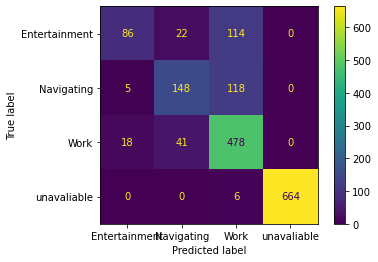

In [67]:
# make prediction
y_pred_clf_gini_pca_scaled = clf_gini_pca_scaled.predict(X_test_pca_scaled)
print(classification_report(y_test_pca_scaled, y_pred_clf_gini_pca_scaled))
print(f'Train accuracy:\t {clf_gini_pca_scaled.score(X_train_pca_scaled, y_train_pca_scaled)}')
print(f'Test accuracy:\t {clf_gini_pca_scaled.score(X_test_pca_scaled, y_test_pca_scaled)}')
scores_pca_scaled['Decision Tree PCA (scaled)'] =  clf_gini_pca_scaled.score(X_test_pca_scaled, y_test_pca_scaled)

ConfusionMatrixDisplay.from_predictions(y_test_pca_scaled, y_pred_clf_gini_pca_scaled)

### Random Forest

In [68]:
# build random forest classifier
rfc_pca_scaled = RandomForestClassifier(criterion='gini', n_estimators=5, random_state=1, n_jobs=2)
# train random forest
rfc_pca_scaled.fit(X_train_pca_scaled, y_train_pca_scaled)

RandomForestClassifier(n_estimators=5, n_jobs=2, random_state=1)

               precision    recall  f1-score   support

Entertainment       0.84      0.85      0.84       222
   Navigating       0.85      0.82      0.83       271
         Work       0.90      0.91      0.90       537
  unavaliable       1.00      0.99      1.00       670

     accuracy                           0.92      1700
    macro avg       0.90      0.89      0.89      1700
 weighted avg       0.92      0.92      0.92      1700

Train accuracy:	 0.9881432896064581
Test accuracy:	 0.9217647058823529


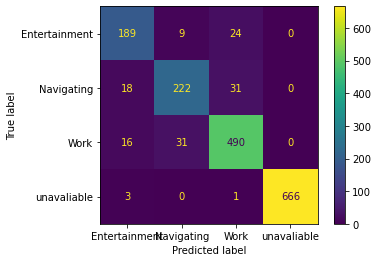

In [69]:
# make prediction
y_pred_rfc_pca_scaled = rfc_pca_scaled.predict(X_test_pca_scaled)
print(classification_report(y_test_pca_scaled, y_pred_rfc_pca_scaled))
print(f'Train accuracy:\t {rfc_pca_scaled.score(X_train_pca_scaled, y_train_pca_scaled)}')
print(f'Test accuracy:\t {rfc_pca_scaled.score(X_test_pca_scaled, y_test_pca_scaled)}')
scores_pca_scaled['Random Forest PCA (scaled)'] = rfc_pca_scaled.score(X_test_pca_scaled, y_test_pca_scaled)

ConfusionMatrixDisplay.from_predictions(y_test_pca_scaled, y_pred_rfc_pca_scaled)

### KNeighbors Classifier

In [70]:
# build KNeighbors classifier
neigh_pca_scaled = KNeighborsClassifier(n_neighbors=2)
# train KNeighbors
neigh_pca_scaled.fit(X_train_pca_scaled, y_train_pca_scaled)

KNeighborsClassifier(n_neighbors=2)

               precision    recall  f1-score   support

Entertainment       0.80      0.94      0.86       222
   Navigating       0.83      0.88      0.85       271
         Work       0.95      0.86      0.91       537
  unavaliable       1.00      1.00      1.00       670

     accuracy                           0.93      1700
    macro avg       0.90      0.92      0.91      1700
 weighted avg       0.93      0.93      0.93      1700

Train accuracy:	 0.9669525731584259
Test accuracy:	 0.9276470588235294


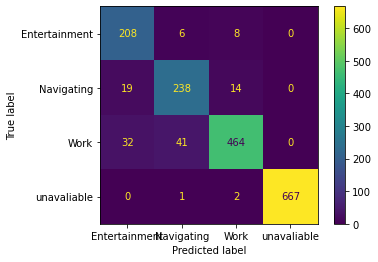

In [71]:
# make prediction
y_pred_neigh_pca_scaled = neigh_pca_scaled.predict(X_test_pca_scaled)
print(classification_report(y_test_pca_scaled, y_pred_neigh_pca_scaled))
print(f'Train accuracy:\t {neigh_pca_scaled.score(X_train_pca_scaled, y_train_pca_scaled)}')
print(f'Test accuracy:\t {neigh_pca_scaled.score(X_test_pca_scaled, y_test_pca_scaled)}')
scores_pca_scaled['KNN PCA (scaled)'] =  neigh_pca_scaled.score(X_test_pca_scaled, y_test_pca_scaled)

ConfusionMatrixDisplay.from_predictions(y_test_pca_scaled, y_pred_neigh_pca_scaled)

### MLP

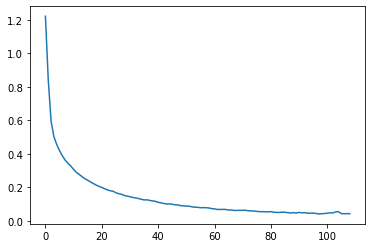

In [72]:
# build MLP classifier
model_pca_scaled = MLPClassifier(hidden_layer_sizes=(200, 40, 10), activation='relu', solver='adam', max_iter=1000)
# train model
model_pca_scaled.fit(X_train_pca_scaled, y_train_pca_scaled)
plt.plot(model_pca_scaled.loss_curve_)

               precision    recall  f1-score   support

Entertainment       0.88      0.88      0.88       222
   Navigating       0.92      0.87      0.89       271
         Work       0.91      0.94      0.93       537
  unavaliable       1.00      0.99      1.00       670

     accuracy                           0.94      1700
    macro avg       0.93      0.92      0.92      1700
 weighted avg       0.94      0.94      0.94      1700

Train accuracy:	 0.989656912209889
Test accuracy:	 0.9423529411764706


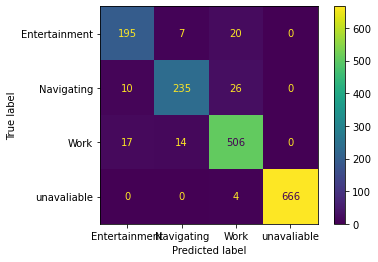

In [73]:
# make prediction
y_pred_mlp_pca_scaled = model_pca_scaled.predict(X_test_pca_scaled)
print(classification_report(y_test_pca_scaled, y_pred_mlp_pca_scaled))
print(f'Train accuracy:\t {model_pca_scaled.score(X_train_pca_scaled, y_train_pca_scaled)}')
print(f'Test accuracy:\t {model_pca_scaled.score(X_test_pca_scaled, y_test_pca_scaled)}')
scores_pca_scaled['MLP PCA (scaled)'] =  model_pca_scaled.score(X_test_pca_scaled, y_test_pca_scaled)

ConfusionMatrixDisplay.from_predictions(y_test_pca_scaled, y_pred_mlp_pca_scaled)

## LDA Classifier

In [81]:
scores_lda_scaled = {}

In [83]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_scaled = LinearDiscriminantAnalysis(n_components=3)
X_lda_scaled = lda_scaled.fit(X_scaled, y).transform(X_scaled)
X_lda_scaled.shape

(5664, 3)

In [84]:
# split X and y into training and testing sets
X_train_lda_scaled, X_test_lda_scaled, y_train_lda_scaled, y_test_lda_scaled = train_test_split(X_lda_scaled, y, test_size=0.30, random_state=42, stratify=y)

print(X_train_lda_scaled.shape, X_test_lda_scaled.shape, y_train_lda_scaled.shape, y_test_lda_scaled.shape)

(3964, 3) (1700, 3) (3964,) (1700,)


# AdaBoost Classifier with Normalized data and LDA

In [86]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(X_train_lda_scaled, y_train_lda_scaled)

y_pred_abc_lda_scaled = abc.predict(X_test_lda_scaled)

from sklearn.metrics import confusion_matrix, accuracy_score
cm_lda_scaled = confusion_matrix(y_test_lda_scaled, y_pred_abc_lda_scaled)
print (cm_lda_scaled)
acc_abc_lda_scaled = accuracy_score(y_test_lda_scaled, y_pred_abc_lda_scaled)
print (acc_abc_lda_scaled)

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0 665   0]
 [  0   0   0 ...   0   0   0]]
0.4541176470588235


# Naïve Bayes with Normalized data and LDA

In [87]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train_lda_scaled, y_train_lda_scaled)

GaussianNB()

In [88]:
y_pred_lda_scaled = nb.predict(X_test_lda_scaled)

In [89]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_lda_scaled = confusion_matrix(y_test_lda_scaled, y_pred_lda_scaled)
print(cm_lda_scaled)
acc_nb_lda_scaled = accuracy_score(y_test_lda_scaled, y_pred_lda_scaled)
print(acc_nb_lda_scaled)

[[  0   0   0 ...   0   0   0]
 [  0   5   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   3 661   0]
 [  0   0   0 ...   0   0   0]]
0.6188235294117647


# Kernel SVM (Support Vector Machine) with Normalized data and LDA

In [90]:
from sklearn.svm import SVC
svc_rbf = SVC(kernel = 'rbf', random_state = 0)
svc_rbf.fit(X_train_lda_scaled, y_train_lda_scaled)

SVC(random_state=0)

In [91]:
y_pred_svc_rbf_lda_scaled = svc_rbf.predict(X_test_lda_scaled)

In [92]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_lda_scaled = confusion_matrix(y_test_lda_scaled, y_pred_svc_rbf_lda_scaled)
print (cm_lda_scaled)
acc_svc_rbf_lda_scaled = accuracy_score(y_test_lda_scaled, y_pred_svc_rbf_lda_scaled)
print (acc_svc_rbf_lda_scaled)

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0 665   0]
 [  0   0   0 ...   0   0   0]]
0.6005882352941176


### Decision tree

In [77]:
# build decision tree classifier
clf_gini_lda_scaled = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0)
# train decision tree
clf_gini_lda_scaled.fit(X_train_lda_scaled, y_train_lda_scaled)

DecisionTreeClassifier(max_depth=5, random_state=0)

               precision    recall  f1-score   support

Entertainment       0.66      0.59      0.62       222
   Navigating       0.78      0.49      0.60       271
         Work       0.70      0.87      0.78       537
  unavaliable       1.00      0.99      1.00       670

     accuracy                           0.82      1700
    macro avg       0.78      0.74      0.75      1700
 weighted avg       0.83      0.82      0.81      1700

Train accuracy:	 0.8375378405650857
Test accuracy:	 0.8205882352941176


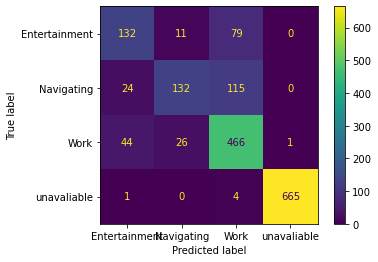

In [78]:
# make prediction
y_pred_clf_gini_lda_scaled = clf_gini_lda_scaled.predict(X_test_lda_scaled)
print(classification_report(y_test_lda_scaled, y_pred_clf_gini_lda_scaled))
print(f'Train accuracy:\t {clf_gini_lda_scaled.score(X_train_lda_scaled, y_train_lda_scaled)}')
print(f'Test accuracy:\t {clf_gini_lda_scaled.score(X_test_lda_scaled, y_test_lda_scaled)}')
scores_lda_scaled['Decision Tree LDA (scaled)'] =  clf_gini_lda_scaled.score(X_test_lda_scaled, y_test_lda_scaled)

ConfusionMatrixDisplay.from_predictions(y_test_lda_scaled, y_pred_clf_gini_lda_scaled)

### Random Forest

In [79]:
# build random forest classifier
rfc_lda_scaled = RandomForestClassifier(criterion='gini', n_estimators=5, random_state=1, n_jobs=2)
# train random forest
rfc_lda_scaled.fit(X_train_lda_scaled, y_train_lda_scaled)

RandomForestClassifier(n_estimators=5, n_jobs=2, random_state=1)

               precision    recall  f1-score   support

Entertainment       0.67      0.77      0.72       222
   Navigating       0.78      0.72      0.75       271
         Work       0.84      0.82      0.83       537
  unavaliable       1.00      1.00      1.00       670

     accuracy                           0.87      1700
    macro avg       0.82      0.83      0.82      1700
 weighted avg       0.87      0.87      0.87      1700

Train accuracy:	 0.9808274470232089
Test accuracy:	 0.8688235294117647


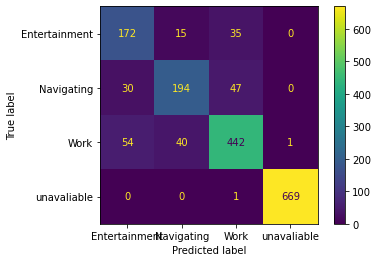

In [80]:
# make prediction
y_pred_rfc_lda_scaled = rfc_lda_scaled.predict(X_test_lda_scaled)
print(classification_report(y_test_lda_scaled, y_pred_rfc_lda_scaled))
print(f'Train accuracy:\t {rfc_lda_scaled.score(X_train_lda_scaled, y_train_lda_scaled)}')
print(f'Test accuracy:\t {rfc_lda_scaled.score(X_test_lda_scaled, y_test_lda_scaled)}')
scores_lda_scaled['Random Forest LDA (scaled)'] = rfc_lda_scaled.score(X_test_lda_scaled, y_test_lda_scaled)

ConfusionMatrixDisplay.from_predictions(y_test_lda_scaled, y_pred_rfc_lda_scaled)

### KNeighbors Classifier

In [81]:
# build KNeighbors classifier
neigh_lda_scaled = KNeighborsClassifier(n_neighbors=5)
# train KNeighbors
neigh_lda_scaled.fit(X_train_lda_scaled, y_train_lda_scaled)

KNeighborsClassifier()

               precision    recall  f1-score   support

Entertainment       0.70      0.78      0.74       222
   Navigating       0.82      0.69      0.75       271
         Work       0.84      0.86      0.85       537
  unavaliable       1.00      1.00      1.00       670

     accuracy                           0.88      1700
    macro avg       0.84      0.83      0.83      1700
 weighted avg       0.88      0.88      0.88      1700

Train accuracy:	 0.9018668012108981
Test accuracy:	 0.8776470588235294


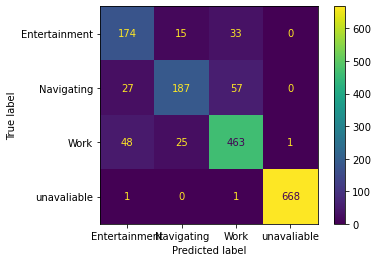

In [82]:
# make prediction
y_pred_neigh_lda_scaled = neigh_lda_scaled.predict(X_test_lda_scaled)
print(classification_report(y_test_lda_scaled, y_pred_neigh_lda_scaled))
print(f'Train accuracy:\t {neigh_lda_scaled.score(X_train_lda_scaled, y_train_lda_scaled)}')
print(f'Test accuracy:\t {neigh_lda_scaled.score(X_test_lda_scaled, y_test_lda_scaled)}')
scores_lda_scaled['KNN LDA (scaled)'] =  neigh_lda_scaled.score(X_test_lda_scaled, y_test_lda_scaled)

ConfusionMatrixDisplay.from_predictions(y_test_lda_scaled, y_pred_neigh_lda_scaled)

### MLP

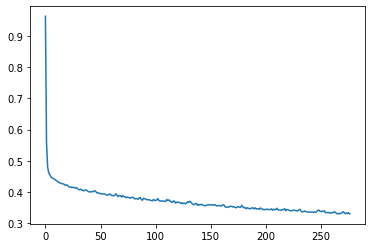

In [83]:
# build MLP classifier
model_lda_scaled = MLPClassifier(hidden_layer_sizes=(200, 40, 10), activation='relu', solver='adam', max_iter=1000)
# train model
model_lda_scaled.fit(X_train_lda_scaled, y_train_lda_scaled)
plt.plot(model_lda_scaled.loss_curve_)

               precision    recall  f1-score   support

Entertainment       0.65      0.74      0.69       222
   Navigating       0.77      0.65      0.70       271
         Work       0.81      0.82      0.81       537
  unavaliable       1.00      1.00      1.00       670

     accuracy                           0.85      1700
    macro avg       0.80      0.80      0.80      1700
 weighted avg       0.85      0.85      0.85      1700

Train accuracy:	 0.8652875882946519
Test accuracy:	 0.851764705882353


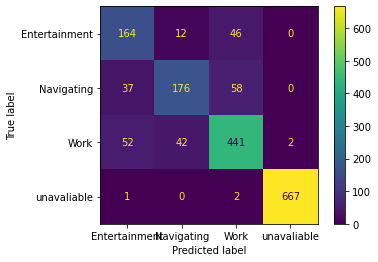

In [84]:
# make prediction
y_pred_mlp_lda_scaled = model_lda_scaled.predict(X_test_lda_scaled)
print(classification_report(y_test_lda_scaled, y_pred_mlp_lda_scaled))
print(f'Train accuracy:\t {model_lda_scaled.score(X_train_lda_scaled, y_train_lda_scaled)}')
print(f'Test accuracy:\t {model_lda_scaled.score(X_test_lda_scaled, y_test_lda_scaled)}')
scores_lda_scaled['MLP LDA (scaled)'] =  model_lda_scaled.score(X_test_lda_scaled, y_test_lda_scaled)

ConfusionMatrixDisplay.from_predictions(y_test_lda_scaled, y_pred_mlp_lda_scaled)

# Final scores

<BarContainer object of 4 artists>

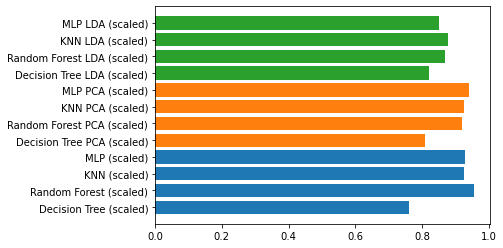

In [85]:
plt.barh(list(scores_scaled.keys()), scores_scaled.values())
plt.barh(list(scores_pca_scaled.keys()), scores_pca_scaled.values())
plt.barh(list(scores_lda_scaled.keys()), scores_lda_scaled.values())

In [86]:
scores_scaled

{'Decision Tree (scaled)': 0.7611764705882353,
 'Random Forest (scaled)': 0.9564705882352941,
 'KNN (scaled)': 0.9258823529411765,
 'MLP (scaled)': 0.93}

In [87]:
scores_pca_scaled

{'Decision Tree PCA (scaled)': 0.8094117647058824,
 'Random Forest PCA (scaled)': 0.9217647058823529,
 'KNN PCA (scaled)': 0.9276470588235294,
 'MLP PCA (scaled)': 0.9423529411764706}

In [88]:
scores_lda_scaled

{'Decision Tree LDA (scaled)': 0.8205882352941176,
 'Random Forest LDA (scaled)': 0.8688235294117647,
 'KNN LDA (scaled)': 0.8776470588235294,
 'MLP LDA (scaled)': 0.851764705882353}

In [97]:
# get the highest accuracy
max(max(scores_scaled.values()), max(scores_pca_scaled.values()), max(scores_lda_scaled.values()))

0.9564705882352941